## Web Scraping
Importamos los datos de los estados con mayor PBI per capita de los Estados Unidos

In [2]:
# Importamos las librerias
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt

In [3]:
url_one = 'https://es.wikipedia.org/wiki/Anexo:Estados_de_los_Estados_Unidos_por_PIB'
page_one = rq.get(url_one).text

In [4]:
# Parseamos el html utilizando BeautifulSoup
soup_one = bs(page_one, 'html.parser')
table_one = soup_one.find('table')

In [5]:
# Creamos un DataFrame vacio
df_pbi = pd.DataFrame(columns=['estados', 'PBI (millones de $)', 'PBI nacional (% del total)', 'poblacion (millones)', 'PBI per capita ($)', 'ranking nacional'])

In [6]:
# Obtenemos las filas de la tabla
for row in table_one.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]

    if len(cols) >= 5:
        estados = cols[0]
        pbi_millones = cols[1]
        porcentaje_pbi = cols[2]
        poblacion = cols[3]
        pbi_per_capita = cols[4]
        ranking = cols[5]

        row_data = {'estados': estados, 'PBI (millones de $)': pbi_millones, 'PBI nacional (% del total)': porcentaje_pbi,
                    'poblacion (millones)': poblacion, 'PBI per capita ($)': pbi_per_capita, 'ranking nacional': ranking}
        df_pbi = pd.concat([df_pbi, pd.DataFrame([row_data])])

In [7]:
df_pbi = df_pbi.iloc[1:]
df_pbi

,estados,PBI (millones de $),PBI nacional (% del total),poblacion (millones),PBI per capita ($),ranking nacional
0,California,1.936.400,13.34,37.3,51.914,12
0,Texas,1.207.432,7.95,25.1,45.940,24
0,Nueva York,1.156.500,7.68,19.4,57.423,7
0,Florida,754.000,5.20,18.8,40.106,40
0,Illinois,644.200,4.44,12.8,50.328,15
0,Pensilvania,575.600,3.97,12.7,45.323,25
0,Nueva Jersey,497.000,3.42,8.8,56.477,8
0,Ohio,483.400,3.33,11.5,"42,035",33
0,Virginia,427.700,2.95,8.0,53.463,9
0,Carolina del Norte,407.400,2.81,9.5,42.884,31


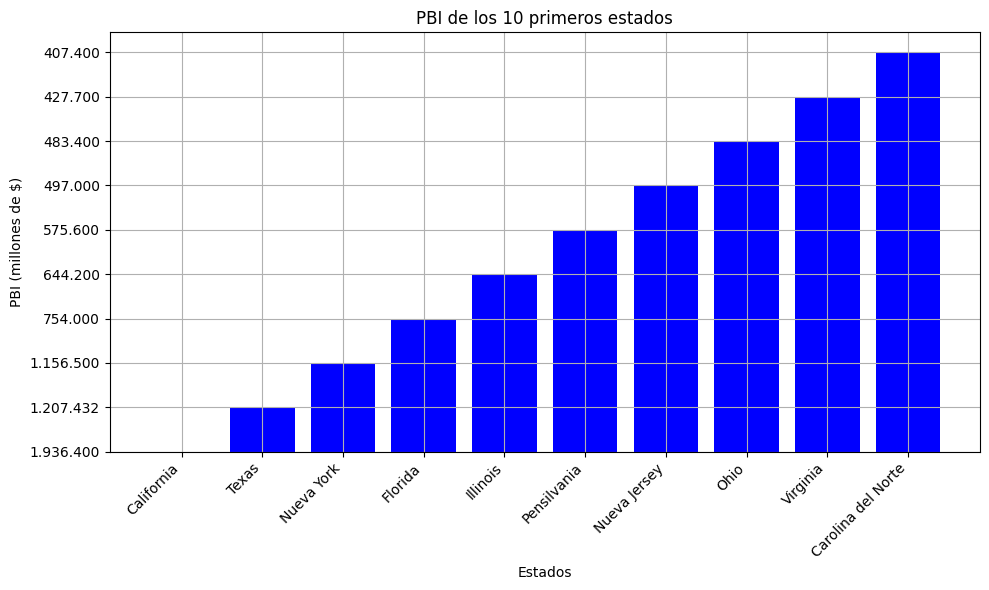

In [8]:
# Tomamos los primeros 10 estados
df_top_10 = df_pbi.head(10)

# Graficamos el PBI per cápita vs. Ranking Nacional para los primeros 10 estados
plt.figure(figsize=(10, 6))
plt.bar(df_top_10['estados'], df_top_10['PBI (millones de $)'], color='b')
plt.title('PBI de los 10 primeros estados')
plt.xlabel('Estados')
plt.ylabel('PBI (millones de $)')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()